In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple
from scipy.integrate import quad
import magpylib as mp
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import shutil

In [62]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/oldpcbair/"
channel1_mat  = np.zeros((10, 10))  # Low Peak Channel 1
channel2_mat  = np.zeros((10, 10))  #High Peak Channel 1
channel3_mat  = np.zeros((10, 10))  #Low Peak Channel 2
channel4_mat  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        channel1_mat[x][y] = peak1
        channel2_mat[x][y] = peak2
    elif channel_value == "b":
        channel3_mat[x][y] = peak1
        channel4_mat[x][y] = peak2
print("DONE Processing")

['(10, 0)', 'b']
['(70, 30)', 'a']
['(10, 40)', 'b']
['(0, 30)', 'a']
['(40, 70)', 'a']
['(70, 90)', 'a']
['(30, 70)', 'a']
['(30, 80)', 'b']
['(60, 30)', 'b']
['(20, 70)', 'a']
['(90, 0)', 'a']
['(60, 10)', 'b']
['(80, 20)', 'a']
['(10, 60)', 'a']
['(70, 0)', 'b']
['(40, 40)', 'a']
['(50, 40)', 'a']
['(20, 80)', 'b']
['(50, 60)', 'a']
['(50, 90)', 'b']
['(70, 90)', 'b']
['(0, 10)', 'b']
['(0, 80)', 'b']
['(20, 60)', 'a']
['(60, 20)', 'a']
['(90, 70)', 'a']
['(40, 60)', 'a']
['(50, 30)', 'a']
['(20, 50)', 'b']
['(80, 80)', 'a']
['(60, 20)', 'b']
['(0, 80)', 'a']
['(70, 70)', 'a']
['(50, 0)', 'b']
['(90, 60)', 'a']
['(30, 90)', 'a']
['(40, 50)', 'b']
['(20, 80)', 'a']
['(80, 0)', 'a']
['(80, 20)', 'b']
['(30, 50)', 'a']
['(40, 80)', 'b']
['(40, 90)', 'a']
['(20, 50)', 'a']
['(20, 30)', 'b']
['(40, 30)', 'b']
['(30, 0)', 'b']
['(60, 80)', 'b']
['(20, 40)', 'b']
['(30, 80)', 'a']
['(90, 80)', 'a']
['(60, 60)', 'b']
['(0, 90)', 'b']
['(70, 60)', 'a']
['(30, 50)', 'b']
['(90, 80)', 'b']
['(

In [63]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/oldpcbpork/"
test_channel1  = np.zeros((10, 10))  # Low Peak Channel 1
test_channel2  = np.zeros((10, 10))  #High Peak Channel 1
test_channel3  = np.zeros((10, 10))  #Low Peak Channel 2
test_channel4  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        test_channel1[x][y] = peak1
        test_channel2[x][y] = peak2
    elif channel_value == "b":
        test_channel3[x][y] = peak1
        test_channel4[x][y] = peak2
print("DONE Processing")

['(10, 0)', 'b']
['(70, 30)', 'a']
['(10, 40)', 'b']
['(0, 30)', 'a']
['(40, 70)', 'a']
['(70, 90)', 'a']
['(30, 70)', 'a']
['(30, 80)', 'b']
['(60, 30)', 'b']
['(20, 70)', 'a']
['(90, 0)', 'a']
['(60, 10)', 'b']
['(80, 20)', 'a']
['(10, 60)', 'a']
['(70, 0)', 'b']
['(40, 40)', 'a']
['(50, 40)', 'a']
['(20, 80)', 'b']
['(50, 60)', 'a']
['(50, 90)', 'b']
['(70, 90)', 'b']
['(0, 10)', 'b']
['(0, 80)', 'b']
['(20, 60)', 'a']
['(60, 20)', 'a']
['(90, 70)', 'a']
['(40, 60)', 'a']
['(50, 30)', 'a']
['(20, 50)', 'b']
['(80, 80)', 'a']
['(60, 20)', 'b']
['(0, 80)', 'a']
['(70, 70)', 'a']
['(50, 0)', 'b']
['(90, 60)', 'a']
['(30, 90)', 'a']
['(40, 50)', 'b']
['(20, 80)', 'a']
['(80, 0)', 'a']
['(80, 20)', 'b']
['(30, 50)', 'a']
['(40, 80)', 'b']
['(40, 90)', 'a']
['(20, 50)', 'a']
['(20, 30)', 'b']
['(40, 30)', 'b']
['(30, 0)', 'b']
['(60, 80)', 'b']
['(20, 40)', 'b']
['(30, 80)', 'a']
['(90, 80)', 'a']
['(60, 60)', 'b']
['(0, 90)', 'b']
['(70, 60)', 'a']
['(30, 50)', 'b']
['(90, 80)', 'b']
['(

In [64]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/oldpcbporkbr/"
nrtest_channel1  = np.zeros((10, 10))  # Low Peak Channel 1
nrtest_channel2  = np.zeros((10, 10))  #High Peak Channel 1
nrtest_channel3  = np.zeros((10, 10))  #Low Peak Channel 2
nrtest_channel4  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        nrtest_channel1[x][y] = peak1
        nrtest_channel2[x][y] = peak2
    elif channel_value == "b":
        nrtest_channel3[x][y] = peak1
        nrtest_channel4[x][y] = peak2
print("DONE Processing")

['(10, 0)', 'b']
['(70, 30)', 'a']
['(10, 40)', 'b']
['(0, 30)', 'a']
['(40, 70)', 'a']
['(70, 90)', 'a']
['(30, 70)', 'a']
['(30, 80)', 'b']
['(60, 30)', 'b']
['(20, 70)', 'a']
['(90, 0)', 'a']
['(60, 10)', 'b']
['(80, 20)', 'a']
['(10, 60)', 'a']
['(70, 0)', 'b']
['(40, 40)', 'a']
['(50, 40)', 'a']
['(20, 80)', 'b']
['(50, 60)', 'a']
['(50, 90)', 'b']
['(70, 90)', 'b']
['(0, 10)', 'b']
['(0, 80)', 'b']
['(20, 60)', 'a']
['(60, 20)', 'a']
['(90, 70)', 'a']
['(40, 60)', 'a']
['(50, 30)', 'a']
['(20, 50)', 'b']
['(80, 80)', 'a']
['(60, 20)', 'b']
['(0, 80)', 'a']
['(70, 70)', 'a']
['(50, 0)', 'b']
['(90, 60)', 'a']
['(30, 90)', 'a']
['(40, 50)', 'b']
['(20, 80)', 'a']
['(80, 0)', 'a']
['(80, 20)', 'b']
['(30, 50)', 'a']
['(40, 80)', 'b']
['(40, 90)', 'a']
['(20, 50)', 'a']
['(20, 30)', 'b']
['(40, 30)', 'b']
['(30, 0)', 'b']
['(60, 80)', 'b']
['(20, 40)', 'b']
['(30, 80)', 'a']
['(90, 80)', 'a']
['(60, 60)', 'b']
['(0, 90)', 'b']
['(70, 60)', 'a']
['(30, 50)', 'b']
['(90, 80)', 'b']
['(

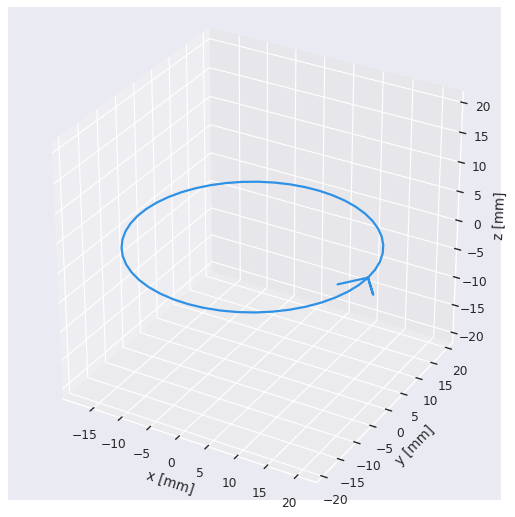

In [71]:
current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
mp.show(current_loop)
B=np.zeros((40,40,20,3),dtype=float)
for i in range(-200,200,10):
    for j in range(-200,200,10):
        for k in range(50,250,10):
            B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

def get_signal_strength(x,c1,c2,c3,c4,c5,c6,k):
    print(x)
    x,y = x
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*x+c2,c3,c1 - 10*y))[2]
    B2=current_loop.getB((10*x+c5,c6,c4 - 10*y))[2]
    return np.abs(B1*B2)*10**k

def get_B1(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*y + 87.3 -170, 0.68 ,-250 + 83.9 + 10*x))[2]
    return B1

def get_B2(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B2=current_loop.getB((10*y + 87.3 -80, 0.68 , 83.9 + 10*x))[2]
    return B2

def get_B3(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B3=current_loop.getB((10*y + 87.3 -80, 0.68 , -250 + 83.9 + 10*x))[2]
    return B3

def get_B4(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B4=current_loop.getB((10*y + 87.3 - 170, 0.68 , 10*x + 83.9))[2]
    return B4

def get_signal_new(channel, coordinates,k):
    if channel == 0:
        BA = get_B1(coordinates)
        BB = get_B3(coordinates)
    elif channel == 1:
        BA = get_B1(coordinates)
        BB = get_B4(coordinates)
    elif channel == 2:
        BA = get_B2(coordinates)
        BB = get_B3(coordinates)
    elif channel == 3:
        BA = get_B2(coordinates)
        BB = get_B4(coordinates)

    return np.abs(BA * BB)*10**k


In [72]:
k_params = [np.log10(channel3_mat)[5,5] - np.log10(get_signal_new(0,(5,5),0)),
np.log10(channel1_mat)[5,5] - np.log10(get_signal_new(1,(5,5),0)),
np.log10(channel4_mat)[5,5] - np.log10(get_signal_new(2,(5,5),0)),
np.log10(channel2_mat)[5,5] - np.log10(get_signal_new(3,(5,5),0))]

In [73]:
X_Features = []
Y_Labels = []
x = np.arange(0,10,.1)
y = np.arange(0,10,.1)
for x_index in x:
    for y_index in y:
        Y_Labels.append([x_index,y_index])
        feature_ray = []
        # feature_ray.append(get_signal_new(0,(x_index,y_index),k_params[0]))
        # feature_ray.append(get_signal_new(3,(x_index,y_index),k_params[3]))
        for chan in range(0,4):
            feature_ray.append(np.log10(get_signal_new(chan,(x_index,y_index),k_params[chan])))
        X_Features.append(feature_ray)

analytical_modal = KNeighborsRegressor(n_neighbors=5)
analytical_modal.fit(X_Features,Y_Labels)

KNeighborsRegressor()

prediction 0.12000000000000002 0.02
actual 0 0
prediction 0.04 0.31999999999999995
actual 0 1
prediction 0.08 1.5399999999999998
actual 0 2
prediction 0.27999999999999997 2.5599999999999996
actual 0 3
prediction 0.3 3.7
actual 0 4
prediction 0.42000000000000004 4.74
actual 0 5
prediction 0.52 5.74
actual 0 6
prediction 0.5800000000000001 6.56
actual 0 7
prediction 0.78 7.5600000000000005
actual 0 8
prediction 0.8800000000000001 8.620000000000001
actual 0 9
prediction 0.5 0.0
actual 1 0
prediction 0.8200000000000001 0.45999999999999996
actual 1 1
prediction 0.9800000000000001 1.56
actual 1 2
prediction 1.08 2.66
actual 1 3
prediction 1.2000000000000002 3.7
actual 1 4
prediction 1.26 4.82
actual 1 5
prediction 1.28 5.640000000000001
actual 1 6
prediction 1.3800000000000001 6.540000000000001
actual 1 7
prediction 1.52 7.360000000000001
actual 1 8
prediction 1.7600000000000002 8.620000000000001
actual 1 9
prediction 1.7 0.0
actual 2 0
prediction 1.72 0.33999999999999997
actual 2 1
predicti

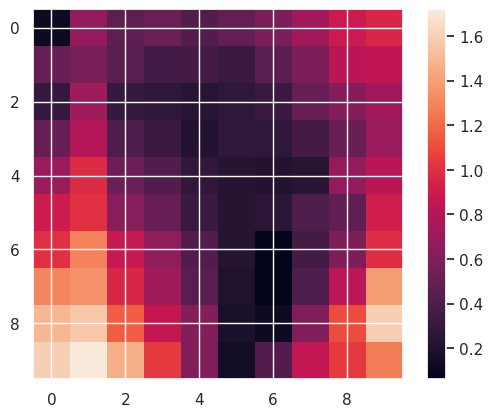

In [74]:
error_mat = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        X_pred = [np.log10(test_channel3[i,j]),np.log10(test_channel1[i,j]),np.log10(test_channel4[i,j]),np.log10(test_channel2[i,j])]
        #X_pred = [test_channel3[i,j],test_channel2[i,j]]
        y=[i,j]
        x,y = analytical_modal.predict([X_pred])[0]
        error_mat[i,j] = np.sqrt((x-i)**2 + (y-j)**2)
        print("prediction",x,y)
        print("actual",i,j)
plt.imshow(error_mat)
print(np.median(error_mat))
print(np.mean(error_mat))
plt.colorbar()

prediction 0.26 0.06000000000000001
actual 0 0
prediction 0.1 0.3466666666666666
actual 0 1
prediction 0.14000000000000004 1.5399999999999998
actual 0 2
prediction 0.26 2.5600000000000005
actual 0 3
prediction 0.3333333333333333 3.673333333333334
actual 0 4
prediction 0.41333333333333333 4.746666666666668
actual 0 5
prediction 0.5133333333333333 5.720000000000001
actual 0 6
prediction 0.5666666666666668 6.593333333333333
actual 0 7
prediction 0.78 7.546666666666668
actual 0 8
prediction 0.8800000000000001 8.620000000000001
actual 0 9
prediction 0.5933333333333334 0.013333333333333334
actual 1 0
prediction 0.8066666666666666 0.4600000000000001
actual 1 1
prediction 0.9666666666666669 1.5733333333333333
actual 1 2
prediction 1.06 2.6599999999999997
actual 1 3
prediction 1.1800000000000002 3.72
actual 1 4
prediction 1.2533333333333336 4.8133333333333335
actual 1 5
prediction 1.2666666666666666 5.626666666666667
actual 1 6
prediction 1.3866666666666667 6.52
actual 1 7
prediction 1.53333333

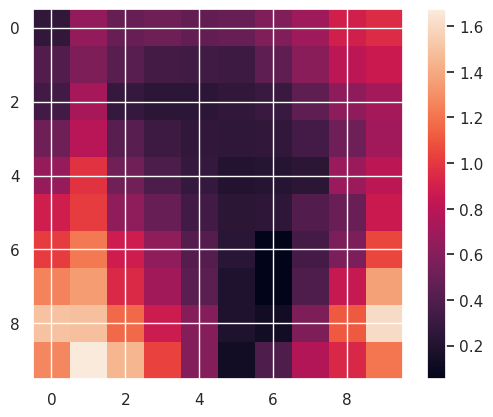

In [69]:
error_mat_nrtest = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        X_pred = [np.log10(nrtest_channel3[i,j]),np.log10(nrtest_channel1[i,j]),np.log10(nrtest_channel4[i,j]),np.log10(nrtest_channel2[i,j])]
        #X_pred = [test_channel3[i,j],test_channel2[i,j]]
        y=[i,j]
        x,y = analytical_modal.predict([X_pred])[0]
        error_mat_nrtest[i,j] = np.sqrt((x-i)**2 + (y-j)**2)
        print("prediction",x,y)
        print("actual",i,j)
plt.imshow(error_mat_nrtest)
print(np.median(error_mat_nrtest))
print(np.mean(error_mat_nrtest))
plt.colorbar()

Text(0, 0.5, 'CDF')

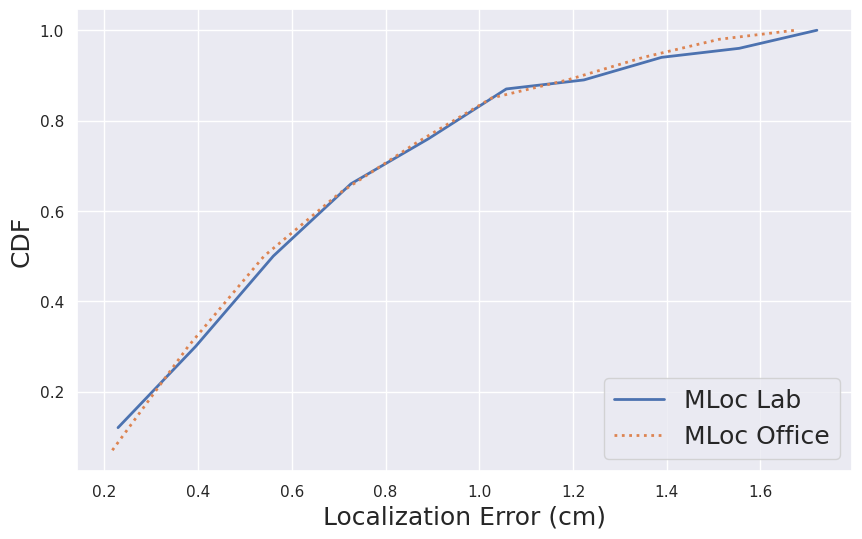

In [76]:
fig, ax = plt.subplots(figsize=(10,6))
counts, bin_edges = np.histogram (error_mat, bins=10, density=True)
cdf = np.cumsum (counts)
ax.plot (bin_edges[1:],cdf/cdf[-1],linewidth=2,label='MLoc Lab')
counts, bin_edges = np.histogram (error_mat_nrtest, bins=10, density=True)
cdf = np.cumsum (counts)
ax.plot (bin_edges[1:],cdf/cdf[-1],linewidth=2, linestyle = "dotted", label='MLoc Office')
ax.legend(fontsize=18, loc='lower right')
ax.set_xlabel('Localization Error (cm)',fontsize=18)
ax.set_ylabel('CDF',fontsize=18)